<a href="https://colab.research.google.com/github/panzershracker/Time-series-retraining/blob/master/les_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание к уроку 4**

In [0]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
from operator import itemgetter

from sklearn.metrics import mean_squared_error
import os

1.Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.



In [0]:
df = pd.read_csv('/content/drive/My Drive/DS for business Retraining/les 4/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [0]:
df_w = df.resample('W').mean()

target = df.columns[1]

In [87]:
df_w.head(3)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.0,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.0,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.0,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000


Уберем лишние признаки, которые после ресемплинга больше не актуальны.

In [0]:
df_w.drop(df_w.columns.difference([target]), 1, inplace=True)

In [89]:
df_w.head(3)

,PJME_MW
Date,
2002-01-06,32392.160839
2002-01-13,31487.386905
2002-01-20,31452.880952


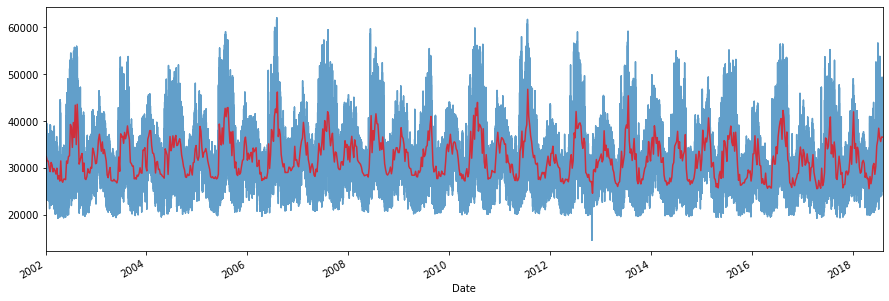

In [90]:
plt.figure(figsize=(15,5))

df[target].plot(alpha=.7)
df_w[target].plot(alpha=.7, c='r')

plt.show()

2.Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

In [0]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [0]:
def split_by_date(df, split_date):
    return df.loc[df.index <= split_date].copy(), \
           df.loc[df.index >  split_date].copy()

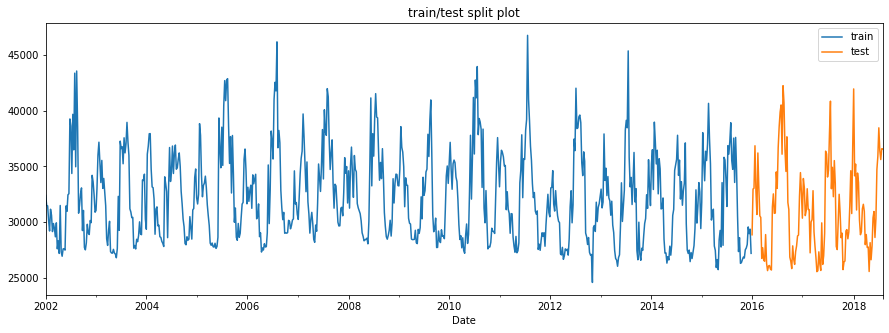

In [94]:
plt.figure(figsize=(15,5))
plt.title('train/test split plot')

train[target].plot(label='train')
test[target].plot(label='test')

plt.legend(loc='best')
plt.show()

In [95]:
adfuller(train[target], regression='ctt')

(-12.770457450610712,
 7.149552954399362e-21,
 11,
 718,
 {'1%': -4.387339937551924,
  '10%': -3.5583673748696163,
  '5%': -3.840639756249849},
 12920.242736326652)

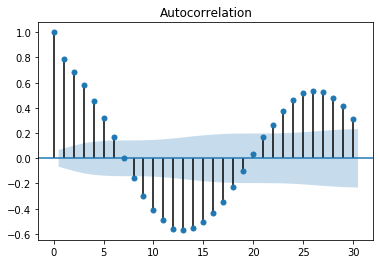

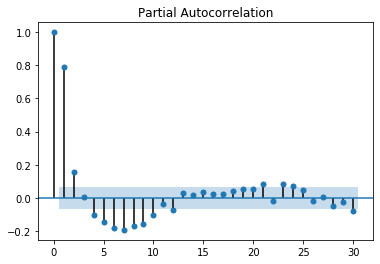

In [103]:
plot_acf(df_w)
plot_pacf(df_w)

plt.show()

In [0]:
df_diff = train[target] - train[target].shift(13)

In [0]:
df_diff.dropna(inplace=True)

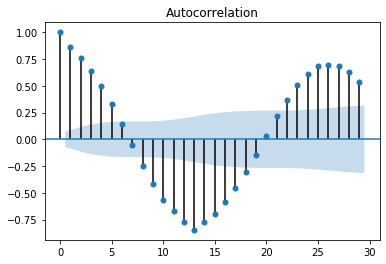

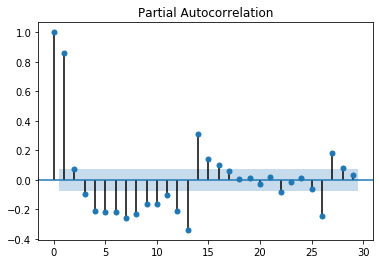

In [99]:
plot_acf(df_diff)
plot_pacf(df_diff)

plt.show()

In [100]:
adfuller(df_diff, regression='ctt')

(-8.11324723652026,
 1.7717301847330666e-10,
 15,
 701,
 {'1%': -4.387734817103025,
  '10%': -3.5584914978379047,
  '5%': -3.840840439531241},
 12962.100976096788)

In [0]:
split_date = '2016-01-01'

train, test = split_by_date(df_w, split_date)

3.Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.


4.Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.


5.Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

6.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда